<a href="https://colab.research.google.com/github/dswh/lil_nlp_with_tensorflow/blob/main/02_02_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embeddings for Sentiment Analysis

This notebook explains an introduction to word embeddings. We will train our own word embeddings using a simple Keras model for a sentiment classification task.

Steps include:
1. Downloading data from tensorflow dataset.
2. Segregating training and testing sentences & labels.
3. Data preparation to padded sequences
4. Defining out Keras model with an Embedding layer.
5. Train the model and explore the weights from the embedding layer.


In [15]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt
print(tf.__version__)

2.5.0


## Downloading the TensorFlow `imdb_review` dataset

> Make sure tensorflow_datasets is installed

In [5]:
##load the imdb reviews dataset
data, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dataset imdb_reviews downloaded and prepared to /home/chiran/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


## Segregating training and testing sets

In [6]:
##segregate training and test set
train_data, test_data = data['train'], data['test']

##create empty list to store sentences and labels
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [7]:
##iterate over the train data to extract sentences and labels
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

##iterate over the test set to extract sentences and labels
for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())



In [8]:
##convert lists into numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Data preparation - setting up the tokenizer

In [9]:
##define the parameters for the tokenizing and padding
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


In [10]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(train_sentences[1])
print(train_padded[1])
print(decode_review(train_padded[1]))

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.
[   0    0    0    0    0    0    0    0   11   26   75  571    6  805
 2354  313  106   19   12    7  629  686    6    4 2219    5  181  584
   64 1454  110 2263    3 3951   21    2    1    3  258   41 4677    4
  174  188   21   12 4078   11 1578 2354   86    2   20   14 1907    2
  112  940   14 1811 1340  548    3  355  181  466    6  591   19   17
   55 1817    5   49   14 4

## Define the Neural Network with Embedding layer

1. Use the Sequential API.
2. Add an embedding input layer of input size equal to vocabulary size.
3. Add a flatten layer, and two dense layers.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model with loss function, optimizer and metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [17]:
num_epochs = 10

##train the model with training and validation set
hist = model.fit(
    train_padded, 
    train_labels, 
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 9.3632e-05 - accuracy: 1.0000 - val_loss: 0.8241 - val_accuracy: 0.8282
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 5.8656e-05 - accuracy: 1.0000 - val_loss: 0.8585 - val_accuracy: 0.8283
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 3.5849e-05 - accuracy: 1.0000 - val_loss: 0.8925 - val_accuracy: 0.8281
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 2.2732e-05 - accuracy: 1.0000 - val_loss: 0.9265 - val_accuracy: 0.8280
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 1.4362e-05 - accuracy: 1.0000 - val_loss: 0.9595 - val_accuracy: 0.8277
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 9.2518e-06 - accuracy: 1.0000 - val_loss: 0.9938 - val_accuracy: 0.8275
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 5.8147e-06 - accuracy: 1.0000 - val_loss: 1.026

In [24]:
print(hist.history)

{'loss': [9.363204299006611e-05, 5.865624552825466e-05, 3.584907608455978e-05, 2.2731504941475578e-05, 1.4362060028361157e-05, 9.251783922081813e-06, 5.814692485728301e-06, 3.7430334032251267e-06, 2.466793148414581e-06, 1.5569384004265885e-06], 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.8240680694580078, 0.8584550619125366, 0.8925157189369202, 0.926478385925293, 0.9595199227333069, 0.9937976002693176, 1.0263607501983643, 1.0612562894821167, 1.0929720401763916, 1.1269912719726562], 'val_accuracy': [0.8281599879264832, 0.828279972076416, 0.8280799984931946, 0.828000009059906, 0.8276799917221069, 0.8275200128555298, 0.8271999955177307, 0.827239990234375, 0.8270400166511536, 0.8267599940299988]}


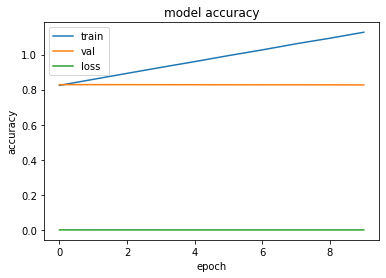

In [25]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val','loss'], loc='upper left')

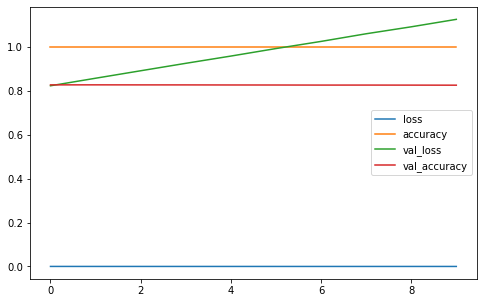

In [26]:
import pandas as pd
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

## Deriving weights from the embedding layer

In [27]:
##isolating the first embedding layer
l1 = model.layers[0]

##extracting learned weights
weights = l1.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)
print(weights[0])

(10000, 16)
[ 0.04424316  0.00319038 -0.01053888 -0.03345805 -0.03587958  0.02572047
  0.01345717 -0.00511297 -0.03587155 -0.05415144  0.00621193  0.03794616
 -0.00587501 -0.0560776   0.00646952 -0.02725558]
